In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [3]:
churn=pd.read_csv('telecom_churn_data.csv')
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

##  Data Exploration

In [4]:
churn.shape

(99999, 226)

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
churn_cat=churn.select_dtypes(include=['object'])
churn_cat.columns

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9'],
      dtype='object')

In [7]:
churn_numeric=churn.select_dtypes(include=['float64','int64'])
churn_numeric.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=214)

In [8]:
churn_numeric.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [9]:
churn.isnull().sum()

mobile_number                   0
circle_id                       0
loc_og_t2o_mou               1018
std_og_t2o_mou               1018
loc_ic_t2o_mou               1018
last_date_of_month_6            0
last_date_of_month_7          601
last_date_of_month_8         1100
last_date_of_month_9         1659
arpu_6                          0
arpu_7                          0
arpu_8                          0
arpu_9                          0
onnet_mou_6                  3937
onnet_mou_7                  3859
onnet_mou_8                  5378
onnet_mou_9                  7745
offnet_mou_6                 3937
offnet_mou_7                 3859
offnet_mou_8                 5378
offnet_mou_9                 7745
roam_ic_mou_6                3937
roam_ic_mou_7                3859
roam_ic_mou_8                5378
roam_ic_mou_9                7745
roam_og_mou_6                3937
roam_og_mou_7                3859
roam_og_mou_8                5378
roam_og_mou_9                7745
loc_og_t2t_mou

In [10]:
round(100*(churn.isnull().sum())/(len(churn.index)),2)

mobile_number                0.00
circle_id                    0.00
loc_og_t2o_mou               1.02
std_og_t2o_mou               1.02
loc_ic_t2o_mou               1.02
last_date_of_month_6         0.00
last_date_of_month_7         0.60
last_date_of_month_8         1.10
last_date_of_month_9         1.66
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
arpu_9                       0.00
onnet_mou_6                  3.94
onnet_mou_7                  3.86
onnet_mou_8                  5.38
onnet_mou_9                  7.75
offnet_mou_6                 3.94
offnet_mou_7                 3.86
offnet_mou_8                 5.38
offnet_mou_9                 7.75
roam_ic_mou_6                3.94
roam_ic_mou_7                3.86
roam_ic_mou_8                5.38
roam_ic_mou_9                7.75
roam_og_mou_6                3.94
roam_og_mou_7                3.86
roam_og_mou_8                5.38
roam_og_mou_9                7.75
loc_og_t2t_mou

In [11]:
churn[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

As per problem statement creation of target variable depends on above 4 features.After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [12]:
churn[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
1,188.04,72.11,0.00,0.00
2,517.74,124.94,0.00,8.42
3,305.38,362.54,0.00,0.00
4,205.31,104.59,0.00,0.00
...,...,...,...,...
99994,154.43,27.14,0.00,0.00
99995,108.84,106.41,0.00,0.00
99996,0.00,0.00,0.00,0.00
99997,2.21,0.00,85.67,4177.14


In [13]:
churn['churn']=churn.total_ic_mou_9+churn.total_og_mou_9+churn.vol_2g_mb_9+churn.vol_3g_mb_9


In [14]:
churn['churn']=churn['churn'].apply(lambda x:1 if x==0 else 0)


In [15]:
churn['churn'].value_counts()

0    89808
1    10191
Name: churn, dtype: int64

creation of target variable and data exploration is done.As per the problem statement we have to filter the high value customers which will be done after data cleaning.

## Data Cleaning 

In [16]:
churn.shape

(99999, 227)

In [17]:
null_perc=round(100*(churn.isnull().sum())/(len(churn.index)),2)

In [18]:
null_perc[null_perc>70]

date_of_last_rech_data_6    74.85
date_of_last_rech_data_7    74.43
date_of_last_rech_data_8    73.66
date_of_last_rech_data_9    74.08
total_rech_data_6           74.85
total_rech_data_7           74.43
total_rech_data_8           73.66
total_rech_data_9           74.08
max_rech_data_6             74.85
max_rech_data_7             74.43
max_rech_data_8             73.66
max_rech_data_9             74.08
count_rech_2g_6             74.85
count_rech_2g_7             74.43
count_rech_2g_8             73.66
count_rech_2g_9             74.08
count_rech_3g_6             74.85
count_rech_3g_7             74.43
count_rech_3g_8             73.66
count_rech_3g_9             74.08
av_rech_amt_data_6          74.85
av_rech_amt_data_7          74.43
av_rech_amt_data_8          73.66
av_rech_amt_data_9          74.08
arpu_3g_6                   74.85
arpu_3g_7                   74.43
arpu_3g_8                   73.66
arpu_3g_9                   74.08
arpu_2g_6                   74.85
arpu_2g_7     

There are 40 features with null percentage >70%.Features which are relevant to model we impute it with 0 value,and non important features we drop them.

In [19]:
rech_var= ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [20]:
churn[rech_var] = churn[rech_var].apply(lambda x: x.fillna(0))

In [21]:
churn[rech_var].isnull().sum()

total_rech_data_6     0
total_rech_data_7     0
total_rech_data_8     0
total_rech_data_9     0
av_rech_amt_data_6    0
av_rech_amt_data_7    0
av_rech_amt_data_8    0
av_rech_amt_data_9    0
max_rech_data_6       0
max_rech_data_7       0
max_rech_data_8       0
max_rech_data_9       0
dtype: int64

In [22]:
churn['night_pck_user_6'].value_counts(dropna=False)

NaN    74846
0.0    24522
1.0      631
Name: night_pck_user_6, dtype: int64

In [23]:
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6', 'fb_user_7','fb_user_8', 'fb_user_9']

In [24]:
churn[cat_cols] = churn[cat_cols].apply(lambda x: x.fillna(-1))  # -1 belongs to new category

converting numerical features to categorical features as they have only 3 unique values

In [25]:
churn['night_pck_user_6']=churn['night_pck_user_6'].astype('category')
churn['night_pck_user_7']=churn['night_pck_user_7'].astype('category')
churn['night_pck_user_8']=churn['night_pck_user_8'].astype('category')
churn['night_pck_user_9']=churn['night_pck_user_9'].astype('category')
churn['fb_user_6']=churn['fb_user_6'].astype('category')
churn['fb_user_7']=churn['fb_user_7'].astype('category')
churn['fb_user_8']=churn['fb_user_8'].astype('category')
churn['fb_user_9']=churn['fb_user_9'].astype('category')

In [26]:
churn[cat_cols].isnull().sum()

night_pck_user_6    0
night_pck_user_7    0
night_pck_user_8    0
night_pck_user_9    0
fb_user_6           0
fb_user_7           0
fb_user_8           0
fb_user_9           0
dtype: int64

In [27]:
churn= churn.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'],axis=1)
churn= churn.drop(['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_2g_9', 'count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','count_rech_3g_9'],axis=1)
churn= churn.drop(['arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_3g_9','arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_2g_9'],axis=1)  

In [28]:
churn.shape

(99999, 207)

In [29]:
null_perc1=round(100*(churn.isnull().sum())/(len(churn.index)),2)

In [30]:
null_perc1[null_perc1==0]

mobile_number           0.0
circle_id               0.0
last_date_of_month_6    0.0
arpu_6                  0.0
arpu_7                  0.0
arpu_8                  0.0
arpu_9                  0.0
total_og_mou_6          0.0
total_og_mou_7          0.0
total_og_mou_8          0.0
total_og_mou_9          0.0
total_ic_mou_6          0.0
total_ic_mou_7          0.0
total_ic_mou_8          0.0
total_ic_mou_9          0.0
total_rech_num_6        0.0
total_rech_num_7        0.0
total_rech_num_8        0.0
total_rech_num_9        0.0
total_rech_amt_6        0.0
total_rech_amt_7        0.0
total_rech_amt_8        0.0
total_rech_amt_9        0.0
max_rech_amt_6          0.0
max_rech_amt_7          0.0
max_rech_amt_8          0.0
max_rech_amt_9          0.0
last_day_rch_amt_6      0.0
last_day_rch_amt_7      0.0
last_day_rch_amt_8      0.0
last_day_rch_amt_9      0.0
total_rech_data_6       0.0
total_rech_data_7       0.0
total_rech_data_8       0.0
total_rech_data_9       0.0
max_rech_data_6     

In [31]:
null_perc1[null_perc1>0]

loc_og_t2o_mou          1.02
std_og_t2o_mou          1.02
loc_ic_t2o_mou          1.02
last_date_of_month_7    0.60
last_date_of_month_8    1.10
last_date_of_month_9    1.66
onnet_mou_6             3.94
onnet_mou_7             3.86
onnet_mou_8             5.38
onnet_mou_9             7.75
offnet_mou_6            3.94
offnet_mou_7            3.86
offnet_mou_8            5.38
offnet_mou_9            7.75
roam_ic_mou_6           3.94
roam_ic_mou_7           3.86
roam_ic_mou_8           5.38
roam_ic_mou_9           7.75
roam_og_mou_6           3.94
roam_og_mou_7           3.86
roam_og_mou_8           5.38
roam_og_mou_9           7.75
loc_og_t2t_mou_6        3.94
loc_og_t2t_mou_7        3.86
loc_og_t2t_mou_8        5.38
loc_og_t2t_mou_9        7.75
loc_og_t2m_mou_6        3.94
loc_og_t2m_mou_7        3.86
loc_og_t2m_mou_8        5.38
loc_og_t2m_mou_9        7.75
loc_og_t2f_mou_6        3.94
loc_og_t2f_mou_7        3.86
loc_og_t2f_mou_8        5.38
loc_og_t2f_mou_9        7.75
loc_og_t2c_mou

lets filter the high value customers first and then impute the missing values before modelling

## filter high-value customers

calculate total data recharge amount

In [32]:
# calculate the total data recharge amount for June and July that is number of recharges * average recharge amount
churn['total_data_rech_6'] = churn.total_rech_data_6 * churn.av_rech_amt_data_6
churn['total_data_rech_7'] = churn.total_rech_data_7 * churn.av_rech_amt_data_7

Add total data recharge and total recharge to get total combined recharge amount for a month

In [33]:
churn['amt_data_6'] = churn.total_rech_amt_6 + churn.total_data_rech_6
churn['amt_data_7'] = churn.total_rech_amt_7 + churn.total_data_rech_7

In [34]:
# calculate average recharge done by customer in June and July
churn['av_amt_data_6_7'] = (churn['amt_data_6'] + churn['amt_data_7'])/2

In [35]:
churn['av_amt_data_6_7'].describe(percentiles=[0.7])

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
50%        275.000000
70%        478.000000
max      61236.000000
Name: av_amt_data_6_7, dtype: float64

Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [36]:
churn_filtered = churn.loc[churn.av_amt_data_6_7 >= churn.av_amt_data_6_7.quantile(0.7), :]

In [37]:
churn_filtered.shape

(30001, 212)

In [38]:
churn_filtered.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,-1.0,0,0,0,0,0,0,0,0,1

In [39]:
churn_filtered.drop(['total_data_rech_6','total_data_rech_7','amt_data_6','amt_data_7','av_amt_data_6_7'],axis=1,inplace=True)

In [40]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 207 entries, mobile_number to churn
dtypes: category(8), float64(155), int64(36), object(8)
memory usage: 46.0+ MB


In [41]:
churn_filtered.drop(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'date_of_last_rech_9','mobile_number','circle_id' ],axis=1,inplace=True)

In [42]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 197 entries, loc_og_t2o_mou to churn
dtypes: category(8), float64(155), int64(34)
memory usage: 43.7 MB


In [43]:
churn_filtered['churn']=churn_filtered['churn'].astype('category')

In [44]:
churn_filtered.churn.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

In [45]:
round(100*(churn_filtered.churn.value_counts())/(len(churn_filtered.index)),5)

0    91.8636
1     8.1364
Name: churn, dtype: float64

In [46]:
round(100*(churn_filtered.isnull().sum())/(len(churn_filtered.index)),2)

loc_og_t2o_mou        0.75
std_og_t2o_mou        0.75
loc_ic_t2o_mou        0.75
arpu_6                0.00
arpu_7                0.00
arpu_8                0.00
arpu_9                0.00
onnet_mou_6           1.82
onnet_mou_7           1.79
onnet_mou_8           3.91
onnet_mou_9           6.34
offnet_mou_6          1.82
offnet_mou_7          1.79
offnet_mou_8          3.91
offnet_mou_9          6.34
roam_ic_mou_6         1.82
roam_ic_mou_7         1.79
roam_ic_mou_8         3.91
roam_ic_mou_9         6.34
roam_og_mou_6         1.82
roam_og_mou_7         1.79
roam_og_mou_8         3.91
roam_og_mou_9         6.34
loc_og_t2t_mou_6      1.82
loc_og_t2t_mou_7      1.79
loc_og_t2t_mou_8      3.91
loc_og_t2t_mou_9      6.34
loc_og_t2m_mou_6      1.82
loc_og_t2m_mou_7      1.79
loc_og_t2m_mou_8      3.91
loc_og_t2m_mou_9      6.34
loc_og_t2f_mou_6      1.82
loc_og_t2f_mou_7      1.79
loc_og_t2f_mou_8      3.91
loc_og_t2f_mou_9      6.34
loc_og_t2c_mou_6      1.82
loc_og_t2c_mou_7      1.79
l

In [47]:
churn_filtered.describe(percentiles=[0.99])

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,29777.0,29777.0,29777.0,30001.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.0,29464.0,28827.0,28100.0,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,30001.000000,30001.000000,30001.000000,30001.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28827.000000,28100.000000,29456.000000,29464.000000,28

In [48]:
churn_filtered.loc_og_t2t_mou_8.describe()

count    28827.000000
mean        81.256858
std        231.399901
min          0.000000
25%          3.830000
50%         23.240000
75%         76.040000
max      10752.560000
Name: loc_og_t2t_mou_8, dtype: float64

We can observe that the range is huge. <br> We can't go with either mean or median as they can skew/distort the whole scenario. <br> Let's check data related variables of 8th month to decide on filling up the missing values.

In [49]:
churn_filtered[churn_filtered['loc_og_t2t_mou_8'].isna()][['roam_og_mou_8','loc_og_t2m_mou_8','loc_og_mou_8','std_og_t2t_mou_8' ,'isd_og_mou_8'  ,'og_others_8']].nunique()

roam_og_mou_8       0
loc_og_t2m_mou_8    0
loc_og_mou_8        0
std_og_t2t_mou_8    0
isd_og_mou_8        0
og_others_8         0
dtype: int64

In [50]:
churn_filtered[churn_filtered['loc_og_t2t_mou_8'].isna()][['roam_og_mou_8','loc_og_t2m_mou_8','loc_og_mou_8','std_og_t2t_mou_8' ,'isd_og_mou_8'  ,'og_others_8']].head()

,roam_og_mou_8,loc_og_t2m_mou_8,loc_og_mou_8,std_og_t2t_mou_8,isd_og_mou_8,og_others_8
111,NaN,NaN,NaN,NaN,NaN,NaN
188,NaN,NaN,NaN,NaN,NaN,NaN
358,NaN,NaN,NaN,NaN,NaN,NaN
527,NaN,NaN,NaN,NaN,NaN,NaN
539,NaN,NaN,NaN,NaN,NaN,NaN


We can infer that the customers hasn't made any calls at all in 8th month. <br>
Let's fill the gap as 0 <br>
Similarly we can impute all the missing values of the columns by 0.

In [51]:
churn_filtered=churn_filtered.fillna(0)

In [52]:
churn_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 197 entries, loc_og_t2o_mou to churn
dtypes: category(9), float64(155), int64(33)
memory usage: 43.5 MB


In [53]:
churn_filtered.isnull().sum() 

loc_og_t2o_mou        0
std_og_t2o_mou        0
loc_ic_t2o_mou        0
arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8    

### All the missing values are completely treated. Target variable is done and filtering the high value customers is done .

## Data preparation 

In [54]:
churn_filtered.dtypes

loc_og_t2o_mou         float64
std_og_t2o_mou         float64
loc_ic_t2o_mou         float64
arpu_6                 float64
arpu_7                 float64
arpu_8                 float64
arpu_9                 float64
onnet_mou_6            float64
onnet_mou_7            float64
onnet_mou_8            float64
onnet_mou_9            float64
offnet_mou_6           float64
offnet_mou_7           float64
offnet_mou_8           float64
offnet_mou_9           float64
roam_ic_mou_6          float64
roam_ic_mou_7          float64
roam_ic_mou_8          float64
roam_ic_mou_9          float64
roam_og_mou_6          float64
roam_og_mou_7          float64
roam_og_mou_8          float64
roam_og_mou_9          float64
loc_og_t2t_mou_6       float64
loc_og_t2t_mou_7       float64
loc_og_t2t_mou_8       float64
loc_og_t2t_mou_9       float64
loc_og_t2m_mou_6       float64
loc_og_t2m_mou_7       float64
loc_og_t2m_mou_8       float64
loc_og_t2m_mou_9       float64
loc_og_t2f_mou_6       float64
loc_og_t

Delete columns that belong to churn month(9th month)

In [55]:
churn_filtered = churn_filtered.filter(regex='[^9]$', axis=1)
churn_filtered.shape

(30001, 150)

In [56]:
churn_filtered_cat=churn_filtered.select_dtypes(include=["category"])
churn_filtered_cat.columns

Index(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7', 'fb_user_8', 'churn'],
      dtype='object')

In [57]:
churn_filtered.night_pck_user_6.nunique()

3

Creating dummy variables for the categorical variables

In [58]:
dummy_var=churn_filtered[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7','fb_user_8']]

In [59]:
dummy_var=pd.get_dummies(dummy_var,drop_first=True)
dummy_var.shape

(30001, 12)

In [60]:
churn_filtered=pd.concat([churn_filtered,dummy_var],axis=1)

In [61]:
churn_filtered.drop(['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6',
       'fb_user_7','fb_user_8'],axis=1,inplace=True)

In [62]:
churn_filtered.shape

(30001, 156)

In [63]:
churn_filtered.dtypes

loc_og_t2o_mou           float64
std_og_t2o_mou           float64
loc_ic_t2o_mou           float64
arpu_6                   float64
arpu_7                   float64
arpu_8                   float64
onnet_mou_6              float64
onnet_mou_7              float64
onnet_mou_8              float64
offnet_mou_6             float64
offnet_mou_7             float64
offnet_mou_8             float64
roam_ic_mou_6            float64
roam_ic_mou_7            float64
roam_ic_mou_8            float64
roam_og_mou_6            float64
roam_og_mou_7            float64
roam_og_mou_8            float64
loc_og_t2t_mou_6         float64
loc_og_t2t_mou_7         float64
loc_og_t2t_mou_8         float64
loc_og_t2m_mou_6         float64
loc_og_t2m_mou_7         float64
loc_og_t2m_mou_8         float64
loc_og_t2f_mou_6         float64
loc_og_t2f_mou_7         float64
loc_og_t2f_mou_8         float64
loc_og_t2c_mou_6         float64
loc_og_t2c_mou_7         float64
loc_og_t2c_mou_8         float64
loc_og_mou

## Deriving new features

Calculate the difference between 8th month data and (6 and 7) month data.

In [64]:
churn_filtered['arpu_diff'] = churn_filtered.arpu_8 - ((churn_filtered.arpu_6 + churn_filtered.arpu_7)/2)
churn_filtered['total_og_mou_diff'] = churn_filtered.total_og_mou_8 - ((churn_filtered.total_og_mou_6 + churn_filtered.total_og_mou_7)/2)
churn_filtered['total_ic_mou_diff'] = churn_filtered.total_ic_mou_8 - ((churn_filtered.total_ic_mou_6 + churn_filtered.total_ic_mou_7)/2)
churn_filtered['total_rech_amt_diff'] = churn_filtered.total_rech_amt_8 - ((churn_filtered.total_rech_amt_6 + churn_filtered.total_rech_amt_7)/2)
churn_filtered['total_rech_data_diff'] = churn_filtered.total_rech_data_8 - ((churn_filtered.total_rech_data_6 + churn_filtered.total_rech_data_7)/2)

In [65]:
churn_filtered['arpu_diff'].describe()

count    30001.000000
mean       -51.038557
std        334.872321
min      -5811.052500
25%       -180.179500
50%        -40.754500
75%         83.239000
max      12808.617000
Name: arpu_diff, dtype: float64

### Univariate analysis

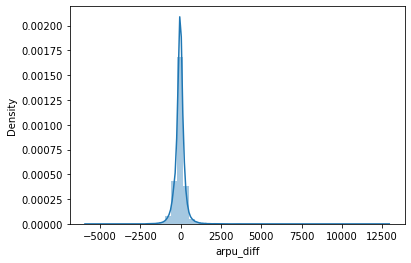

In [66]:
sns.distplot(churn_filtered.arpu_diff)
plt.show()

In [67]:
churn_filtered['arpu_8'].describe()

count    30001.000000
mean       508.597957
std        501.961981
min       -945.808000
25%        231.473000
50%        427.585000
75%        661.491000
max      33543.624000
Name: arpu_8, dtype: float64

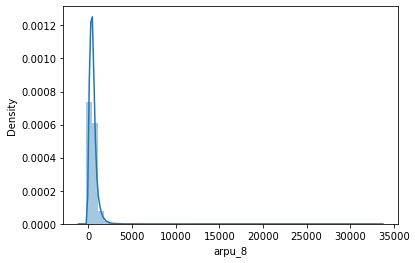

In [68]:
sns.distplot(churn_filtered.arpu_8)
plt.show()

In [69]:
churn_filtered['onnet_mou_8'].describe()

count    30001.000000
mean       234.112539
std        458.448598
min          0.000000
25%         10.390000
50%         65.610000
75%        239.960000
max      10752.560000
Name: onnet_mou_8, dtype: float64

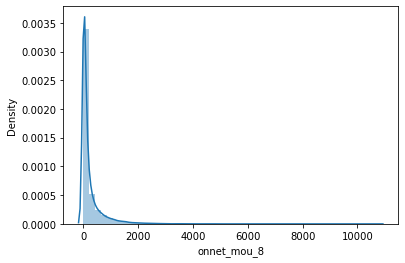

In [70]:
sns.distplot(churn_filtered.onnet_mou_8 )
plt.show()

Most of them are right skewed distribution indicating the presence of outliers.we should not drop the outliers as there may be a business person has too many calls in a month.So before modelling the outliers can be removed by scaling

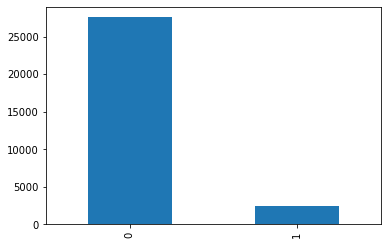

In [71]:
churn_filtered['churn'].value_counts().plot(kind='bar')
plt.show()

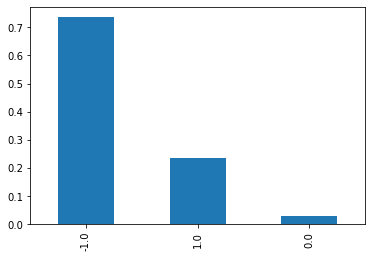

In [72]:
churn['fb_user_8'].value_counts(normalize=True).plot(kind='bar')
plt.show()

### bivariate analysis 

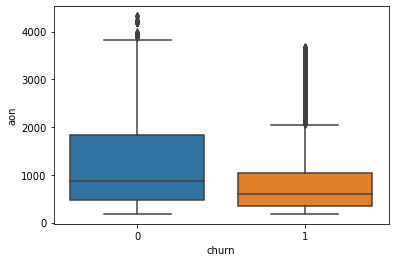

In [73]:
sns.boxplot(data=churn_filtered, x="churn", y="aon")
plt.show()

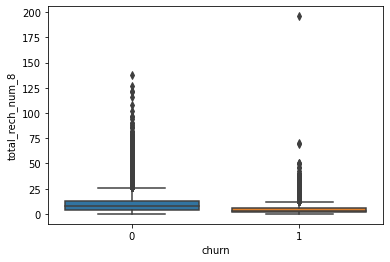

In [74]:
sns.boxplot(data=churn_filtered, x="churn", y="total_rech_num_8")
plt.show()

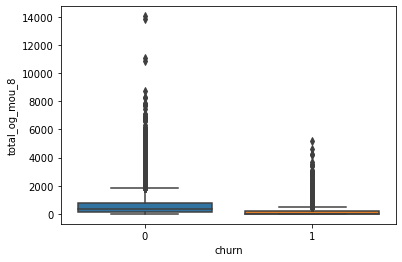

In [75]:
sns.boxplot(data=churn_filtered, x="churn", y="total_og_mou_8")
plt.show()

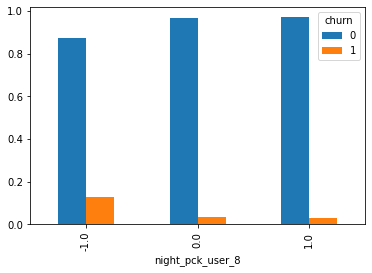

In [76]:
churn.groupby(['night_pck_user_8'])['churn'].value_counts(normalize=True).unstack().plot(kind='bar')
plt.show()

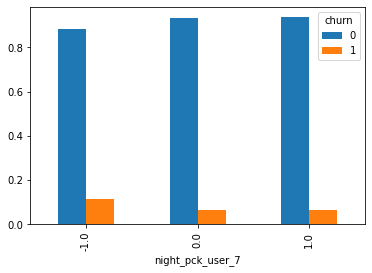

In [77]:
churn.groupby(['night_pck_user_7'])['churn'].value_counts(normalize=True).unstack().plot(kind='bar')
plt.show()

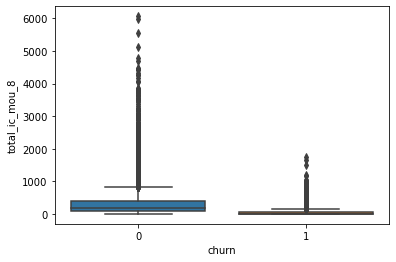

In [78]:
sns.boxplot(data=churn_filtered, x="churn", y="total_ic_mou_8")
plt.show()

In [79]:
churn_fil_corr= churn_filtered.corr()
churn_fil_corr

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,arpu_diff,total_og_mou_diff,total_ic_mou_diff,total_rech_amt_diff,total_rech_data_diff
loc_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_og_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loc_ic_t2o_mou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [80]:
churn_filtered.churn.value_counts()

0    27560
1     2441
Name: churn, dtype: int64

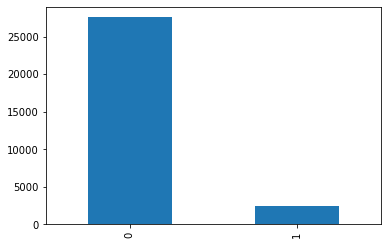

In [81]:
churn_filtered['churn'].value_counts().plot(kind='bar')
plt.show()

We see that the target variable is clearly imbalanced.first we will do without SMOTE and check the metrics. Then we use SMOTE  technique to balance the imbalance data. 

## Modelling 

In [82]:
churn_filtered['churn'] = churn_filtered['churn'].astype('int64')

Dividing the data into X and y data frames

In [83]:
y=churn_filtered.pop('churn')
X=churn_filtered

In [84]:
print(X.shape,y.shape)

(30001, 160) (30001,)


### Train test split

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [86]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,train_size=0.75,random_state=100)

In [87]:
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(22500, 160)
(22500,)
(7501, 160)
(7501,)


In [88]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22500 entries, 79416 to 18732
Columns: 160 entries, loc_og_t2o_mou to total_rech_data_diff
dtypes: float64(123), int64(25), uint8(12)
memory usage: 25.8 MB


In [89]:
scaler=StandardScaler()

In [90]:
X_train1[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','og_others_6','og_others_7','og_others_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','ic_others_6','ic_others_7','ic_others_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','aon','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g','arpu_diff','total_og_mou_diff','total_ic_mou_diff','total_rech_amt_diff','total_rech_data_diff']]=scaler.fit_transform(X_train1[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','og_others_6','og_others_7','og_others_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','ic_others_6','ic_others_7','ic_others_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','aon','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g','arpu_diff','total_og_mou_diff','total_ic_mou_diff','total_rech_amt_diff','total_rech_data_diff']])

In [91]:
X_train1.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,arpu_diff,total_og_mou_diff,total_ic_mou_diff,total_rech_amt_diff,total_rech_data_diff
79416,0.0,0.0,0.0,-0.002944,-0.550100,-0.452965,-0.541004,-0.470439,-0.462156,0.183178,-0.261638,-0.095814,-0.211473,-0.168431,-0.170551,-0.231327,-0.211614,-0.192061,-0.318505,-0.179026,-0.246337,0.885603,0.013734,0.362411,2.003398,2.576777,2.426908,-0.250174,-0.202410,-0.226054,0.524492,0.045227,0.205707,-0.409684,-0.41435,-0.372643,-0.437597,-0.433654,-0.382842,-0.025974,0.629111,-0.143428,0.0,0.0,0.0,-0.567026,-0.553665,-0.502952,-0.044233,-0.04374,-0.040574,0.871363,0.071268,-0.330350,-0.144090,-0.016312,-0.017415,-0.194583,-0.471649,-0.343353,-0.294320,-0.320088,-0.270359,0.889131,0.232256,0.030217,6.732652,4.337270,3.831707,1.439174,0.655992,0.412884,-0.184850,-0.179383,-0.194509,-0.291020,-0.289937,-0.263912,-0.136773,-0.138104,-0.119689,0.0,0.0,0.0,-0.331720,-0.323906,-0.313984,1.159965,0.415834,0.206217,1.166114,-0.138269,-0.236869,0.225361,-0.049835,-0.160183,-0.065769,-0.038489,0.078887,-0.513853,-0.824502,-0.537991,-0.049229,-0.504727,-0.308053,-0.092113,-0.289821,-0.177000,-0.701826,-0.701356,0.249479,-0.235526,-0.597755,-0.540101,0.669125,-0.701489,-0.657055,0.119527,-0.673671,-0.622298,1.115578,-0.375454,-0.334994,-0.366533,-0.396861,-0.375552,1.898856,-0.408207,-0.376885,-0.423096,-0.441641,-0.415258,-0.360517,-0.344454,-0.342358,-0.211053,-0.209024,-0.184499,1.627846,-0.400772,-0.401365,-0.377813,-0.150879,1,0,0,0,0,0,0,1,0,0,0,0,-0.303448,-0.010949,-0.972848,-0.075088,-0.162392
52467,0.0,0.0,0.0,-1.159622,-0.761167,-0.633896,-0.568353,-0.559634,-0.509575,-0.774194,-0.755341,-0.691848,-0.211473,-0.168431,-0.170551,-0.231327,-0.211614,-0.192061,-0.374204,-0.3568

In [92]:
X_test1[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','og_others_6','og_others_7','og_others_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','ic_others_6','ic_others_7','ic_others_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','aon','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g','arpu_diff','total_og_mou_diff','total_ic_mou_diff','total_rech_amt_diff','total_rech_data_diff']]=scaler.transform(X_test1[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','og_others_6','og_others_7','og_others_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','ic_others_6','ic_others_7','ic_others_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','aon','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g','arpu_diff','total_og_mou_diff','total_ic_mou_diff','total_rech_amt_diff','total_rech_data_diff']])

In [93]:
X_test1.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,arpu_diff,total_og_mou_diff,total_ic_mou_diff,total_rech_amt_diff,total_rech_data_diff
20296,0.0,0.0,0.0,-0.044671,-0.051627,-0.437310,-0.533627,-0.548119,-0.492227,-0.662157,-0.725843,-0.645790,-0.211473,-0.168431,-0.170551,-0.231327,-0.211614,-0.192061,-0.358601,-0.343445,-0.306774,-0.471640,-0.651537,-0.586862,-0.123528,-0.225224,-0.219496,-0.245527,-0.202410,-0.226054,-0.536211,-0.655373,-0.580847,-0.379073,-0.408879,-0.372643,-0.426219,-0.413211,-0.368961,-0.072662,-0.140937,-0.063171,0.0,0.0,0.0,-0.539919,-0.551905,-0.492105,-0.044233,-0.04374,-0.040574,-0.256844,-0.167643,-0.174130,-0.144090,-0.016312,-0.017415,-0.780156,-0.843887,-0.736977,-0.346208,-0.370267,-0.372728,-0.449228,-0.540931,-0.581555,-0.144123,-0.010147,0.197672,-0.514049,-0.574020,-0.571462,0.172127,-0.179383,-0.194509,-0.211474,-0.279577,-0.229509,0.132976,-0.138104,-0.119689,0.0,0.0,0.0,-0.034540,-0.316677,-0.288204,-0.488597,-0.647744,-0.633763,-0.312380,-0.138269,-0.236869,-0.140607,-0.151592,-0.160183,-0.076170,-0.087695,-0.090189,0.015393,-0.080004,-0.646274,0.083094,0.138298,-0.445362,-0.285666,-0.125084,-0.096539,-0.494014,0.340152,0.344208,-0.586359,-0.597755,-0.540101,-0.692525,-0.701489,-0.657055,-0.664166,-0.673671,-0.622298,-0.382381,-0.375454,-0.334994,-0.366533,-0.396861,-0.375552,-0.401982,-0.408207,-0.376885,-0.423096,-0.441641,-0.415258,-0.360517,-0.344454,-0.342358,-0.211053,-0.209024,-0.184499,-0.560238,-0.400772,-0.401365,-0.377813,-0.150879,0,0,0,0,0,0,0,0,0,0,0,0,-0.619293,0.105001,-0.079277,-0.838960,0.061920
8279,0.0,0.0,0.0,-1.023337,-0.715559,-0.821179,-0.533692,-0.540136,-0.489036,-0.719229,-0.712980,-0.684515,-0.137064,-0.168431,-0.124331,-0.197513,-0.105038,-0.

# Model building 

### Using logistic regression with RFE and without PCA

In [94]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [95]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 40)             
rfe = rfe.fit(X_train1, y_train1)

In [96]:
list(zip(X_train1.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 121),
 ('std_og_t2o_mou', False, 120),
 ('loc_ic_t2o_mou', False, 119),
 ('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', False, 5),
 ('onnet_mou_6', False, 33),
 ('onnet_mou_7', False, 96),
 ('onnet_mou_8', False, 76),
 ('offnet_mou_6', False, 98),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_6', False, 35),
 ('roam_ic_mou_7', False, 83),
 ('roam_ic_mou_8', False, 90),
 ('roam_og_mou_6', False, 102),
 ('roam_og_mou_7', True, 1),
 ('roam_og_mou_8', False, 55),
 ('loc_og_t2t_mou_6', False, 32),
 ('loc_og_t2t_mou_7', False, 49),
 ('loc_og_t2t_mou_8', False, 31),
 ('loc_og_t2m_mou_6', False, 45),
 ('loc_og_t2m_mou_7', False, 93),
 ('loc_og_t2m_mou_8', False, 104),
 ('loc_og_t2f_mou_6', False, 81),
 ('loc_og_t2f_mou_7', False, 64),
 ('loc_og_t2f_mou_8', False, 73),
 ('loc_og_t2c_mou_6', False, 20),
 ('loc_og_t2c_mou_7', False, 94),
 ('loc_og_t2c_mou_8', False, 57),
 ('loc_og_mou_6', False, 99),
 ('loc_og_mou_7', False, 92),
 ('loc_

In [97]:
col = X_train1.columns[rfe.support_]

In [98]:
X_train1.columns[~rfe.support_]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'roam_ic_mou_6', 'roam_ic_mou_7',
       ...
       'night_pck_user_6_1.0', 'night_pck_user_7_0.0', 'night_pck_user_7_1.0',
       'night_pck_user_8_1.0', 'fb_user_6_0.0', 'fb_user_6_1.0',
       'fb_user_7_1.0', 'arpu_diff', 'total_og_mou_diff',
       'total_rech_amt_diff'],
      dtype='object', length=120)

In [99]:
X_train1_rfe1=X_train1[col]
X_train1_rfe1.columns

Index(['arpu_6', 'arpu_7', 'offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_7', 'std_og_t2m_mou_7',
       'std_og_t2f_mou_8', 'isd_og_mou_8', 'og_others_6', 'total_og_mou_7',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'total_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_7',
       'max_rech_amt_7', 'last_day_rch_amt_8', 'total_rech_data_8',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'monthly_2g_7', 'monthly_2g_8', 'aon',
       'aug_vbc_3g', 'sep_vbc_3g', 'night_pck_user_8_0.0', 'fb_user_7_0.0',
       'fb_user_8_0.0', 'fb_user_8_1.0', 'total_ic_mou_diff',
       'total_rech_data_diff'],
      dtype='object')

In [100]:
X_test1_rfe1=X_test1[X_train1_rfe1.columns]

In [101]:
print(X_train1_rfe1.shape,X_test1_rfe1.shape)

(22500, 40) (7501, 40)


In [102]:
logreg.fit(X_train1_rfe1,y_train1)

LogisticRegression()

evaluate on test data set

In [103]:
y_pred_lr1=logreg.predict(X_test1_rfe1)

In [104]:
y_pred_lr1[:10,]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [105]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

In [106]:
cm = confusion_matrix(y_test1, y_pred_lr1)
print(cm)

[[6794   71]
 [ 469  167]]


In [107]:
precision_score(y_test1, y_pred_lr1)

0.7016806722689075

In [108]:
recall_score(y_test1, y_pred_lr1)

0.26257861635220126

In [109]:
y_pred_prob_lr1 = logreg.predict_proba(X_test1_rfe1)[:, 1]

In [110]:
y_pred_prob_lr1

array([0.19308277, 0.09612576, 0.00613771, ..., 0.07694732, 0.01454957,
       0.59619555])

In [111]:
round(roc_auc_score(y_test1, y_pred_prob_lr1),2)

0.9

In [112]:
print(classification_report(y_test1, y_pred_lr1))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      6865
           1       0.70      0.26      0.38       636

    accuracy                           0.93      7501
   macro avg       0.82      0.63      0.67      7501
weighted avg       0.92      0.93      0.91      7501



As we can see the recall here on churn is only 26% which means 26% are churned and on non churn it gives 99% as the models are more biased towards the majority case.hence we can correct this by using SMOTE technique.

In [113]:
from imblearn.over_sampling import SMOTE

In [114]:
sm=SMOTE(random_state=100)

In [115]:
X_sm,y_sm=sm.fit_resample(X,y)

In [116]:
print(y_sm.value_counts())

1    27560
0    27560
Name: churn, dtype: int64


### Train test split

In [117]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,train_size=0.75,random_state=100)

In [118]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(41340, 160)
(41340,)
(13780, 160)
(13780,)


In [119]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41340 entries, 31230 to 38408
Columns: 160 entries, loc_og_t2o_mou to total_rech_data_diff
dtypes: float64(123), int64(25), uint8(12)
memory usage: 47.5 MB


In [120]:
X_train[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','og_others_6','og_others_7','og_others_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','ic_others_6','ic_others_7','ic_others_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','aon','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g','arpu_diff','total_og_mou_diff','total_ic_mou_diff','total_rech_amt_diff','total_rech_data_diff']]=scaler.fit_transform(X_train[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','og_others_6','og_others_7','og_others_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','ic_others_6','ic_others_7','ic_others_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','aon','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g','arpu_diff','total_og_mou_diff','total_ic_mou_diff','total_rech_amt_diff','total_rech_data_diff']])

In [121]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,arpu_diff,total_og_mou_diff,total_ic_mou_diff,total_rech_amt_diff,total_rech_data_diff
31230,0.0,0.0,0.0,-0.991676,0.438726,0.254929,-0.322382,0.780377,0.184811,-0.614846,0.514303,0.013196,-0.198447,-0.143210,0.210987,-0.028789,0.449858,1.348727,-0.340316,-0.073669,-0.235380,-0.493002,0.343640,-0.216589,-0.231222,-0.233890,-0.241758,-0.268103,-0.180499,-0.226884,-0.545373,0.166399,-0.293133,-0.214025,0.762823,-0.022746,-0.405324,0.444162,0.028097,-0.141607,-0.129208,-0.114827,0.0,0.0,0.0,-0.426226,0.809360,0.001435,-0.071538,-0.062322,-0.043059,-0.386313,-0.128544,-0.176394,-0.204165,-0.020171,-0.018772,-0.652075,0.810196,-0.145510,-0.336017,-0.087724,-0.272797,-0.592558,-0.411690,-0.379321,-0.312832,-0.296121,-0.181517,-0.615132,-0.372549,-0.419323,-0.199919,-0.002842,-0.051268,-0.325490,-0.059705,-0.029275,-0.139472,-0.120007,-0.110395,0.0,0.0,0.0,-0.360092,-0.059047,-0.062338,-0.700120,-0.338787,-0.375757,-0.442841,-0.132537,-0.160593,-0.160240,0.005112,0.029078,-0.120706,-0.088106,-0.097692,-0.681993,0.600425,0.167708,-0.982323,0.668426,0.107406,-0.294693,-0.141995,0.121898,-0.548914,0.158945,-0.253608,-0.587965,-0.563116,-0.435578,-0.625604,-0.592523,-0.494761,-0.626207,-0.601651,-0.476844,-0.379690,-0.349182,-0.271053,-0.372787,-0.35333,-0.298948,-0.301280,-0.303237,-0.27323,-0.420482,-0.414054,-0.326637,-0.310241,-0.292095,-0.260077,-0.196351,-0.17712,-0.142431,-0.886919,0.049094,-0.356002,-0.355862,-0.114106,0,0,0,0,0,0,0,0,0,0,0,0,0.623063,-0.229744,0.268029,0.302739,0.252580
27809,0.0,0.0,0.0,-0.049713,-0.503034,0.116422,-0.530778,-0.529141,-0.378105,0.116512,-0.220464,0.536405,-0.216962,-0.193985,-0.197683,-0.244685,-0.079490,-0.217420,-0.290237,-0.2564

In [122]:
X_test[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','og_others_6','og_others_7','og_others_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','ic_others_6','ic_others_7','ic_others_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','aon','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g','arpu_diff','total_og_mou_diff','total_ic_mou_diff','total_rech_amt_diff','total_rech_data_diff']]=scaler.transform(X_test[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou','arpu_6','arpu_7','arpu_8','onnet_mou_6','onnet_mou_7','onnet_mou_8','offnet_mou_6','offnet_mou_7','offnet_mou_8','roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','loc_og_mou_6','loc_og_mou_7','loc_og_mou_8','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_og_mou_6','std_og_mou_7','std_og_mou_8','isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','spl_og_mou_6','spl_og_mou_7','spl_og_mou_8','og_others_6','og_others_7','og_others_8','total_og_mou_6','total_og_mou_7','total_og_mou_8','loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8','std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8','ic_others_6','ic_others_7','ic_others_8','total_rech_num_6','total_rech_num_7','total_rech_num_8','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','max_rech_data_6','max_rech_data_7','max_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','monthly_2g_6','monthly_2g_7','monthly_2g_8','sachet_2g_6','sachet_2g_7','sachet_2g_8','monthly_3g_6','monthly_3g_7','monthly_3g_8','sachet_3g_6','sachet_3g_7','sachet_3g_8','aon','aug_vbc_3g','jul_vbc_3g','jun_vbc_3g','sep_vbc_3g','arpu_diff','total_og_mou_diff','total_ic_mou_diff','total_rech_amt_diff','total_rech_data_diff']])

In [123]:
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,night_pck_user_6_0.0,night_pck_user_6_1.0,night_pck_user_7_0.0,night_pck_user_7_1.0,night_pck_user_8_0.0,night_pck_user_8_1.0,fb_user_6_0.0,fb_user_6_1.0,fb_user_7_0.0,fb_user_7_1.0,fb_user_8_0.0,fb_user_8_1.0,arpu_diff,total_og_mou_diff,total_ic_mou_diff,total_rech_amt_diff,total_rech_data_diff
22210,0.0,0.0,0.0,-0.902006,0.050211,0.041054,-0.412394,-0.380482,-0.213587,-0.610865,-0.549039,-0.231434,-0.216962,-0.193985,-0.197683,-0.244685,-0.257942,-0.221792,0.095211,0.108873,0.231095,-0.469038,-0.373606,0.151832,1.759845,0.940353,0.901707,-0.268103,-0.21374,-0.226884,-0.144982,-0.121385,0.282747,-0.459970,-0.43704,-0.329121,-0.475033,-0.447576,-0.345357,-0.141607,-0.105110,0.025830,0.0,0.0,0.0,-0.638985,-0.601527,-0.442460,-0.071538,-0.062322,-0.043059,-0.361745,0.249591,-0.288856,-0.204165,-0.020171,-0.018772,-0.671034,-0.602799,-0.251611,0.434276,1.172963,1.437204,-0.434978,-0.555531,0.278749,0.090635,-0.119454,-0.039976,-0.076175,0.174856,0.883919,-0.208810,-0.195217,-0.166854,-0.319055,-0.282638,-0.226515,9.711851,1.57573,3.398426,0.0,0.0,0.0,0.823085,-0.120864,0.203297,0.199014,0.066207,0.798228,-0.442841,-0.132537,-0.160593,-0.160240,-0.161729,-0.142371,-0.120706,-0.110259,-0.002234,-0.783334,-0.369176,-0.427648,-0.894751,0.090148,0.073770,-0.306214,-0.026162,0.195700,-0.347275,0.509673,0.680959,-0.587965,0.136674,0.379076,-0.625604,0.818490,1.079649,-0.626207,1.040534,1.365284,-0.379690,-0.291973,-0.174556,-0.372787,1.166845,0.971486,-0.30128,5.385802,-0.27323,-0.420482,-0.414054,0.170498,-0.310241,-0.292095,-0.260077,-0.196351,-0.177120,0.982322,1.201183,-0.318993,-0.356002,-0.355862,-0.114106,0,0,1,0,1,0,0,0,0,1,0,1,0.557416,0.533125,0.843822,0.558105,0.712034
48205,0.0,0.0,0.0,-0.893241,-1.208198,-0.873121,-0.580400,-0.557911,-0.436481,-0.729617,-0.700859,-0.575803,-0.216962,-0.193985,-0.197683,-0.244685,-0.257942,-0.221792,-0.323636,-0.327145,-0.278886,-0.57

# Model building with SMOTE

### Using logistic regression with RFE  and without PCA

In [124]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [125]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 40)             
rfe = rfe.fit(X_train, y_train)

In [126]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 121),
 ('std_og_t2o_mou', False, 120),
 ('loc_ic_t2o_mou', False, 119),
 ('arpu_6', True, 1),
 ('arpu_7', False, 23),
 ('arpu_8', False, 13),
 ('onnet_mou_6', False, 49),
 ('onnet_mou_7', True, 1),
 ('onnet_mou_8', False, 40),
 ('offnet_mou_6', False, 108),
 ('offnet_mou_7', False, 62),
 ('offnet_mou_8', False, 12),
 ('roam_ic_mou_6', False, 33),
 ('roam_ic_mou_7', False, 72),
 ('roam_ic_mou_8', False, 79),
 ('roam_og_mou_6', False, 34),
 ('roam_og_mou_7', False, 6),
 ('roam_og_mou_8', False, 107),
 ('loc_og_t2t_mou_6', False, 77),
 ('loc_og_t2t_mou_7', False, 109),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 11),
 ('loc_og_t2m_mou_7', False, 10),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 112),
 ('loc_og_t2f_mou_7', False, 38),
 ('loc_og_t2f_mou_8', False, 73),
 ('loc_og_t2c_mou_6', False, 43),
 ('loc_og_t2c_mou_7', False, 42),
 ('loc_og_t2c_mou_8', False, 69),
 ('loc_og_mou_6', False, 67),
 ('loc_og_mou_7', False, 64),
 ('

In [127]:
col = X_train.columns[rfe.support_]

In [128]:
X_train.columns[~rfe.support_]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_7',
       'arpu_8', 'onnet_mou_6', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'jul_vbc_3g', 'jun_vbc_3g', 'night_pck_user_7_0.0',
       'night_pck_user_7_1.0', 'night_pck_user_8_0.0', 'night_pck_user_8_1.0',
       'arpu_diff', 'total_og_mou_diff', 'total_ic_mou_diff',
       'total_rech_amt_diff'],
      dtype='object', length=120)

In [129]:
X_train_rfe=X_train[col]
X_train_rfe.columns

Index(['arpu_6', 'onnet_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'total_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'total_rech_data_6',
       'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6',
       'max_rech_data_7', 'av_rech_amt_data_6', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'sep_vbc_3g', 'night_pck_user_6_0.0',
       'night_pck_user_6_1.0', 'fb_user_6_0.0', 'fb_user_6_1.0',
       'fb_user_7_0.0', 'fb_user_7_1.0', 'fb_user_8_0.0', 'fb_user_8_1.0',
       'total_rech_data_diff'],
      dtype='object')

In [130]:
X_test_rfe=X_test[X_train_rfe.columns]

In [131]:
print(X_train_rfe.shape,X_test_rfe.shape)

(41340, 40) (13780, 40)


In [132]:
logreg.fit(X_train_rfe,y_train)

LogisticRegression()

evaluate on test data set

In [133]:
y_pred_lr=logreg.predict(X_test_rfe)

In [134]:
y_pred_lr[:10,]

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int64)

In [135]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

In [136]:
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

[[6212  634]
 [ 591 6343]]


In [137]:
precision_score(y_test, y_pred_lr)

0.9091299985667192

In [138]:
recall_score(y_test, y_pred_lr)

0.9147678107874243

In [139]:
y_pred_prob_lr = logreg.predict_proba(X_test_rfe)[:, 1]

In [140]:
y_pred_prob_lr

array([0.00210356, 0.99602915, 0.84662699, ..., 0.79204116, 0.04074764,
       0.99680827])

In [141]:
round(roc_auc_score(y_test, y_pred_prob_lr),2)

0.97

In [142]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      6846
           1       0.91      0.91      0.91      6934

    accuracy                           0.91     13780
   macro avg       0.91      0.91      0.91     13780
weighted avg       0.91      0.91      0.91     13780



we got a decent score on recall and precision by using logistic regression with rfe by selecting top 40 features .Now by using class imbalance technique we see that each metric gives above 90% on test data.

## Build another model with random forest along with hyper parameter tuning 

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [144]:
rf = RandomForestClassifier(random_state=100, n_jobs=-1)

In [145]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [146]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [147]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits
Wall time: 3min 50s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [148]:
grid_search.best_score_

0.9489598451862603

In [149]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=100)

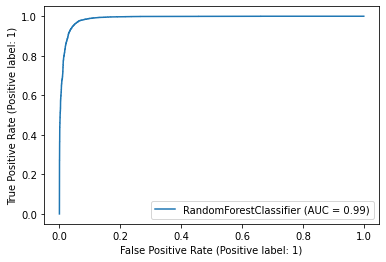

In [150]:
plot_roc_curve(rf_best, X_test, y_test)
plt.show()

In [151]:
y_pred_rf= grid_search.predict(X_test)

In [153]:
from sklearn.metrics import accuracy_score

In [154]:
accuracy_score(y_test, y_pred_rf)

0.9549346879535558

In [155]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      6846
           1       0.95      0.96      0.96      6934

    accuracy                           0.95     13780
   macro avg       0.95      0.95      0.95     13780
weighted avg       0.95      0.95      0.95     13780



random forest with hyperparameter tuning gives all the metric with about 95%.therefore by far this is the best model 

## PCA 

In [156]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [157]:
pca = PCA(random_state=100)

In [158]:
pca.fit(X_train)

PCA(random_state=100)

In [159]:
pca.components_

array([[-2.67889567e-20, -1.38777878e-16, -2.77555756e-17, ...,
        -1.11559069e-02,  1.25975430e-02,  7.38713945e-02],
       [-1.87187091e-19, -1.66533454e-16,  4.44089210e-16, ...,
         3.99758573e-02,  1.19148675e-01,  7.86743376e-03],
       [ 1.06215065e-19, -1.94289029e-16, -9.71445147e-17, ...,
         1.24141901e-01,  7.98115295e-02,  4.44350463e-02],
       ...,
       [ 0.00000000e+00,  9.26080789e-03,  3.99513176e-02, ...,
         1.97642500e-03,  1.46367293e-15, -7.31131175e-04],
       [ 9.99998010e-01,  5.15696787e-04,  1.81476434e-03, ...,
        -1.16312922e-05, -1.20782663e-16, -1.64142287e-04],
       [-0.00000000e+00,  1.65952752e-01, -6.30366673e-02, ...,
         5.74467134e-04, -4.06120450e-15, -1.64095413e-03]])

In [160]:
pca.explained_variance_ratio_

array([1.00403244e-01, 9.17759924e-02, 5.75445637e-02, 4.71539858e-02,
       3.89204163e-02, 3.78674419e-02, 3.08617362e-02, 2.80261135e-02,
       2.54742784e-02, 2.27204079e-02, 2.17751666e-02, 1.97711101e-02,
       1.94092987e-02, 1.86096453e-02, 1.76986269e-02, 1.74100389e-02,
       1.64848750e-02, 1.62426213e-02, 1.48440034e-02, 1.39129194e-02,
       1.35243034e-02, 1.32463549e-02, 1.19937002e-02, 1.11963978e-02,
       1.08595784e-02, 9.84719787e-03, 9.41993969e-03, 9.29470763e-03,
       8.76112258e-03, 8.50857333e-03, 7.98081708e-03, 7.58172281e-03,
       7.44073042e-03, 7.21263390e-03, 7.09422171e-03, 6.90707576e-03,
       6.72943837e-03, 6.64346597e-03, 6.61221160e-03, 6.33753373e-03,
       6.14550440e-03, 5.97398745e-03, 5.66296341e-03, 5.26532714e-03,
       5.11149345e-03, 4.85608797e-03, 4.83097687e-03, 4.63103421e-03,
       4.60941296e-03, 4.38425354e-03, 4.18420328e-03, 4.08375814e-03,
       4.07693321e-03, 3.82126302e-03, 3.73542568e-03, 3.72805837e-03,
      

In [161]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [162]:
var_cumu

array([0.10040324, 0.19217924, 0.2497238 , 0.29687779, 0.3357982 ,
       0.37366564, 0.40452738, 0.43255349, 0.45802777, 0.48074818,
       0.50252335, 0.52229446, 0.54170376, 0.5603134 , 0.57801203,
       0.59542207, 0.61190694, 0.62814956, 0.64299357, 0.65690649,
       0.67043079, 0.68367714, 0.69567084, 0.70686724, 0.71772682,
       0.72757402, 0.73699396, 0.74628867, 0.75504979, 0.76355836,
       0.77153918, 0.7791209 , 0.78656163, 0.79377427, 0.80086849,
       0.80777556, 0.814505  , 0.82114847, 0.82776068, 0.83409821,
       0.84024372, 0.84621771, 0.85188067, 0.857146  , 0.86225749,
       0.86711358, 0.87194455, 0.87657559, 0.881185  , 0.88556925,
       0.88975346, 0.89383722, 0.89791415, 0.90173541, 0.90547084,
       0.9091989 , 0.91287001, 0.91632576, 0.91967831, 0.92291532,
       0.92609859, 0.9291945 , 0.93225604, 0.93523041, 0.93795899,
       0.940567  , 0.94312179, 0.94561464, 0.94801652, 0.95036541,
       0.95268265, 0.95492225, 0.95715487, 0.95930948, 0.96137

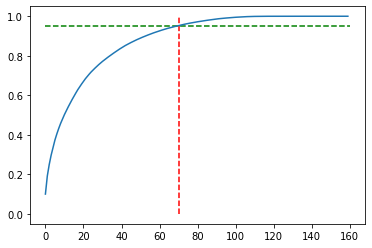

In [163]:
plt.plot(var_cumu)
plt.vlines(x=70, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=160, xmin=0, colors="g", linestyles="--")

Perform PCA with 70 components as 95% of variance is explained by these components

In [164]:
pca_final = IncrementalPCA(n_components=70)

In [165]:
df_train_pca = pca_final.fit_transform(X_train)

In [166]:
df_train_pca.shape

(41340, 70)

In [167]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [168]:
corrmat.shape

(70, 70)

<AxesSubplot:>

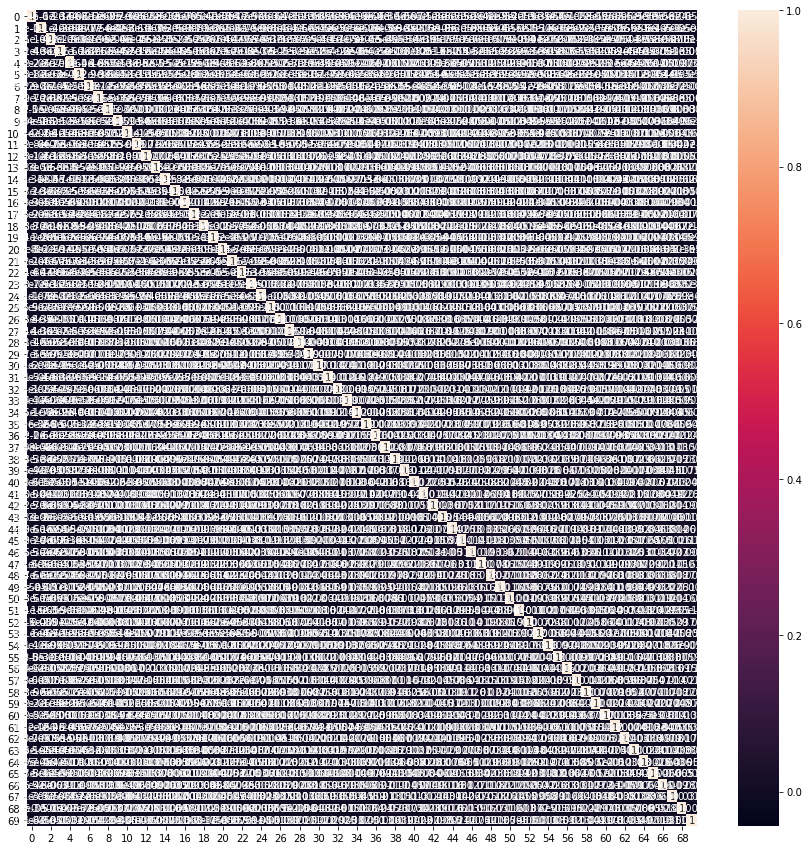

In [169]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

In [170]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(13780, 70)

#### Applying logistic regression with PCA

In [171]:
model_pca = logreg.fit(df_train_pca, y_train)

In [172]:
pred_probs_test_pca = model_pca.predict_proba(df_test_pca)

In [173]:
round(roc_auc_score(y_test, pred_probs_test_pca[:,1]),2)

0.93

In [174]:
y_pred_test_pca=logreg.predict(df_test_pca)

In [175]:
print(classification_report(y_test, y_pred_test_pca))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      6846
           1       0.84      0.88      0.86      6934

    accuracy                           0.85     13780
   macro avg       0.86      0.85      0.85     13780
weighted avg       0.86      0.85      0.85     13780



## Build another model with Xgboost 

In [176]:
import xgboost as xgb 


In [177]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic',random_state=100)
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': 100,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [178]:
xgb_cfl.fit(X_train,y_train)

[16:05:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              random_state=100, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [179]:
xgb_predictions = xgb_cfl.predict(X_test)
xgb_predictions

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [180]:
xgb_predictions_prob = xgb_cfl.predict_proba(X_test)
xgb_predictions_prob

array([[9.9990845e-01, 9.1578666e-05],
       [1.2370348e-01, 8.7629652e-01],
       [4.1242898e-02, 9.5875710e-01],
       ...,
       [9.9631810e-01, 3.6818867e-03],
       [9.9739456e-01, 2.6054643e-03],
       [1.8399954e-04, 9.9981600e-01]], dtype=float32)

In [181]:
accuracy_score(y_test, xgb_predictions)

0.9683599419448476

In [182]:
print(classification_report(y_test, xgb_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6846
           1       0.97      0.97      0.97      6934

    accuracy                           0.97     13780
   macro avg       0.97      0.97      0.97     13780
weighted avg       0.97      0.97      0.97     13780



By comparing random forest and xg boost ,Random forest gives the accuracy of about 95% and other metric of about 95% from the classification report.But Xgboost gives the metric of about 97%.Thus we can consider the best model chosen is Xgboost 

# Feature importance 

### using XGBOOST

In [183]:
xgb_cfl.feature_importances_

array([0.        , 0.        , 0.        , 0.00144004, 0.0013064 ,
       0.00150738, 0.00117318, 0.0011433 , 0.00135708, 0.00152152,
       0.00113685, 0.00106706, 0.00339008, 0.0010378 , 0.00973885,
       0.00417719, 0.00340838, 0.06238952, 0.00197427, 0.00162036,
       0.00135195, 0.0012578 , 0.0012733 , 0.00168817, 0.00153526,
       0.00170914, 0.00107403, 0.00184969, 0.00317275, 0.00167868,
       0.00124262, 0.00201456, 0.00354696, 0.00203345, 0.00343599,
       0.00158458, 0.00104645, 0.0020594 , 0.00108575, 0.00123393,
       0.00226821, 0.00192509, 0.        , 0.        , 0.        ,
       0.00177828, 0.00470661, 0.00091111, 0.00251155, 0.00390634,
       0.00295282, 0.00270261, 0.00496415, 0.00163159, 0.00678848,
       0.00112602, 0.        , 0.00124426, 0.00220173, 0.01190596,
       0.00135933, 0.00111857, 0.00178592, 0.0018498 , 0.00097687,
       0.00179602, 0.00258128, 0.00342176, 0.00152185, 0.0019656 ,
       0.0008817 , 0.14432417, 0.00160929, 0.00253595, 0.00121

In [184]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": xgb_cfl.feature_importances_
})

In [185]:
imp_df

,Varname,Imp
0,loc_og_t2o_mou,0.000000
1,std_og_t2o_mou,0.000000
2,loc_ic_t2o_mou,0.000000
3,arpu_6,0.001440
4,arpu_7,0.001306
5,arpu_8,0.001507
6,onnet_mou_6,0.001173
7,onnet_mou_7,0.001143
8,onnet_mou_8,0.001357
9,offnet_mou_6,0.001522


In [186]:
imp_df.sort_values(by="Imp", ascending=False).head(30)

,Varname,Imp
71,loc_ic_mou_8,0.144324
154,fb_user_8_1.0,0.140195
89,total_ic_mou_8,0.076454
17,roam_og_mou_8,0.062390
147,night_pck_user_8_0.0,0.060293
144,night_pck_user_6_1.0,0.019642
113,total_rech_data_8,0.017044
159,total_rech_data_diff,0.015301
148,night_pck_user_8_1.0,0.014790
131,sachet_2g_8,0.013578


In [2]:

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [3]:
trace = go.Scatter(
    y = xgb_cfl.feature_importances_,
    x =  X_train.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1.3,
        size = 12,
        color = xgb_cfl.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = X_train.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'XGBOOST Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')

NameError: name 'xgb_cfl' is not defined